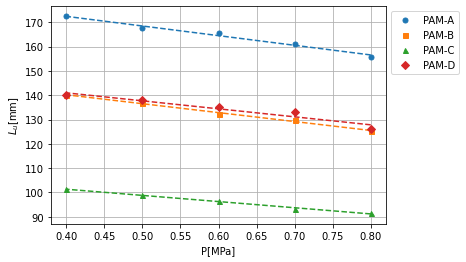

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
file_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\length_pressure\\length_pressure.csv' 
df = pd.read_csv(file_path, index_col=0)

# 欠損値を含む行を削除
df_cleaned = df.dropna()

# グラフのプロット
fig, ax = plt.subplots()
markers = ['o', 's', '^', 'D']  # 各データに対する記号を指定
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # カラーサイクルから色を取得

for i, col in enumerate(df_cleaned.columns):
    # 線形回帰の計算
    x = df_cleaned.index.values.reshape(-1, 1)
    y = df_cleaned[col].values.reshape(-1, 1)
    model = np.polyfit(x.flatten(), y.flatten(), 1)
    predicted = np.poly1d(model)(x)

    # データ点のプロット
    ax.plot(df_cleaned.index, df_cleaned[col], label=col, marker=markers[i], linestyle='None', markersize=5, color=colors[i])

    # 最小二乗法による線をプロット
    ax.plot(df_cleaned.index, predicted, linestyle='--', color=colors[i])

# グラフの装飾
ax.set_xlabel('$P$[MPa]')
ax.set_ylabel('$L_u$[mm]')

# 凡例をグラフの外に表示
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

save_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\length_pressure\\length_pressure.jpg'  # 保存先のパスを変更
plt.savefig(save_path, bbox_inches='tight')  # bbox_inches='tight' で余白を最小限に設定

plt.grid(True)
plt.show()


